# Stochastic Sinkhorn Singular Vectors

This Jupyter Notebook will walk you through an easy example of stochastic computation of Sinkhorn Singular Vectors. This example is small enough to be run on CPU.

## Imports

In [1]:
import wsingular
import torch
import matplotlib.pyplot as plt
import numpy as np

## Generate toy data

In [2]:
# Define the dtype and device to work with.
dtype = torch.double
device = "cpu"

In [3]:
# Define the dimensions of our problem.
n_samples = 20
n_features = 30

In [4]:
# Initialize an empty dataset.
dataset = torch.zeros((n_features, n_samples), dtype=dtype)

# Iterate over the features and samples.
for i in range(n_features):
    for j in range(n_samples):

        # Fill the dataset with translated histograms.
        dataset[i, j] = i/n_features - j/n_samples
        dataset[i, j] = torch.abs(dataset[i, j] % 1)

# Take the distance to 0 on the torus.
dataset = torch.min(dataset, 1 - dataset)

# Make it a guassian.
dataset = torch.exp(-(dataset**2) / 0.1)

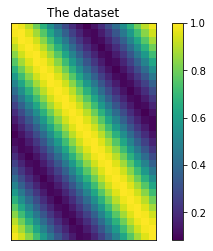

In [5]:
# Plot the dataset.
plt.title('The dataset')
plt.imshow(dataset)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

## Compute the SSV

In [6]:
# Compute the SSV.
C, D = wsingular.stochastic_sinkhorn_singular_vectors(
    dataset,
    dtype=dtype,
    device=device,
    eps=5e-2,
    sample_prop=1e-1,
    p=1,
    n_iter=1_000,
    progress_bar=True,
)

  0%|          | 0/36 [00:00<?, ?it/s]/users/csb/huizing/anaconda3/lib/python3.8/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


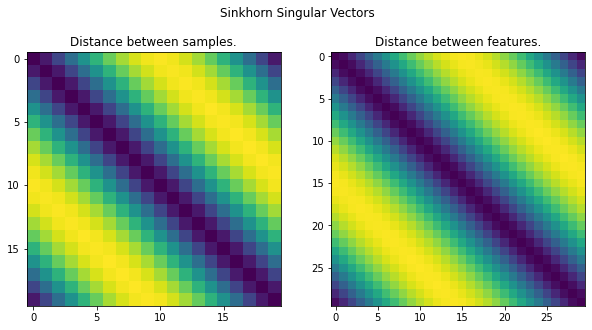

In [7]:
# Display the SSV.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Sinkhorn Singular Vectors')

axes[0].set_title('Distance between samples.')
axes[0].imshow(D)
axes[0].set_xticks(range(0, n_samples, 5))
axes[0].set_yticks(range(0, n_samples, 5))

axes[1].set_title('Distance between features.')
axes[1].imshow(C)
axes[1].set_xticks(range(0, n_features, 5))
axes[1].set_yticks(range(0, n_features, 5))

plt.show()